# Application: retards d'avions

**Problème** : Prédire les retards d'arrivée des vols

## À propos des données

Dans cet exemple sur les compagnies aériennes, l'ensemble de données `flight_delay` est généré de manière synthétique et est utilisé pour développer le modèle de régression linéaire multiple afin de prédire les retards d'arrivée des vols. 

L'ensemble de données contient au total 3 593 observations et 11 variables ; 10 variables sont numériques et 1 variable est catégorique. `Arr_Delay` est la variable dépendante ou variable cible qui est continue dans la nature et toutes les autres variables sont indépendantes ou variables explicatives dans les données.

Lire les données à partir du répertoire de travail, créez votre propre répertoire de travail directement pour lire l'ensemble de données.

In [41]:
data1 <- read.csv("flight_delay.csv", header=TRUE, sep=",")

Afficher les 6 premières lignes de l'ensemble de données pour voir à quoi ressemblent les données

In [42]:
head(data1)

Carrier Airport_Distance Number_of_flights Weather Support_Crew_Available
1 UA      437              41300             5        83                   
2 UA      451              41516             5        82                   
3 AA      425              37404             5       175                   
4 B6      454              44798             6        49                   
5 DL      455              40643             6        55                   
6 UA      416              39707             5       146                   
  Baggage_loading_time Late_Arrival_o Cleaning_o Fueling_o Security_o Arr_Delay
1 17                   19             15         26        31         58       
2 17                   19             15         22        32         48       
3 16                   17             14         28        29         16       
4 18                   19             13         29        31         81       
5 17                   19             18         26        37         62       
6 16                   19              6         28        31         34

## Décrire la structure des données

In [43]:
str(data1)

'data.frame':	3593 obs. of  11 variables:
 $ Carrier               : chr  "UA" "UA" "AA" "B6" ...
 $ Airport_Distance      : int  437 451 425 454 455 416 439 446 441 456 ...
 $ Number_of_flights     : int  41300 41516 37404 44798 40643 39707 45627 40415 42248 43453 ...
 $ Weather               : int  5 5 5 6 6 5 5 5 6 6 ...
 $ Support_Crew_Available: int  83 82 175 49 55 146 141 145 58 3 ...
 $ Baggage_loading_time  : int  17 17 16 18 17 16 16 17 17 18 ...
 $ Late_Arrival_o        : int  19 19 17 19 19 19 19 18 19 19 ...
 $ Cleaning_o            : int  15 15 14 13 18 6 15 9 9 10 ...
 $ Fueling_o             : int  26 22 28 29 26 28 21 25 17 24 ...
 $ Security_o            : int  31 32 29 31 37 31 39 39 53 36 ...
 $ Arr_Delay             : int  58 48 16 81 62 34 63 47 39 122 ...


## Nom de la colonne (variables)
Afficher le nom de la colonne (variables) des données

In [44]:
names(data1)

[1] "Carrier"                "Airport_Distance"       "Number_of_flights"     
 [4] "Weather"                "Support_Crew_Available" "Baggage_loading_time"  
 [7] "Late_Arrival_o"         "Cleaning_o"             "Fueling_o"             
[10] "Security_o"             "Arr_Delay"

## Statistiques descriptives
Afficher les statistiques descriptives des données

In [45]:
summary(data1$Arr_Delay)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    49.0    70.0    69.8    90.0   180.0 

## Valeurs manquantes
Vérifions les valeurs manquantes présentes dans les données

In [46]:
sum(is.na(data1))

[1] 0

## Corrélation entre les variables
Déterminer la corrélation entre les variables

In [47]:
corr <- cor.test(data1$Arr_Delay,data1$Number_of_flights, method = "pearson" )

In [48]:
corr


	Pearson's product-moment correlation

data:  data1$Arr_Delay and data1$Number_of_flights
t = 86.823, df = 3591, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8121611 0.8332786
sample estimates:
     cor 
0.823004 


La méthode de corrélation des moments de Pearson est utilisée pour découvrir la corrélation entre deux variables. Il existe une forte corrélation positive (82 %) entre `Arr_Delay` et `Number_of_Flights`, ce qui signifie que les deux variables sont directement proportionnelles l'une à l'autre. `Arr_Delay` augmente avec l'augmentation de `Number_of_Flights`. Pour déterminer si la corrélation entre les variables est significative, nous devons comparer la valeur p avec le niveau de signification (0.05). Dans ce cas, la valeur p pour la corrélation entre `Arr_Delay` et `Number_of_Flights` est inférieure au niveau de signification de 0.05, ce qui indique que le coefficient de corrélation est significatif.


## 4 en 1
Pour ajouter quatre graphiques dans une seule fenêtre ou un panneau de tracé

In [49]:
par(mfrow = c(2, 2))

## Quelques graphiques

Pour tracer la variable dépendante et la variable indépendante

In [50]:
# install.packages("gridExtra")

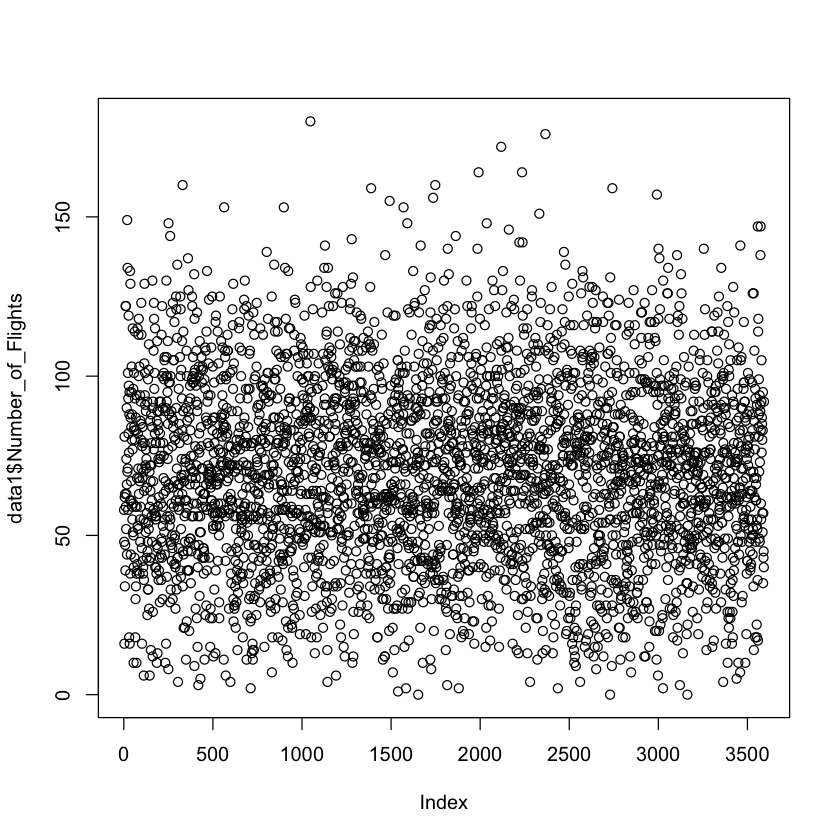

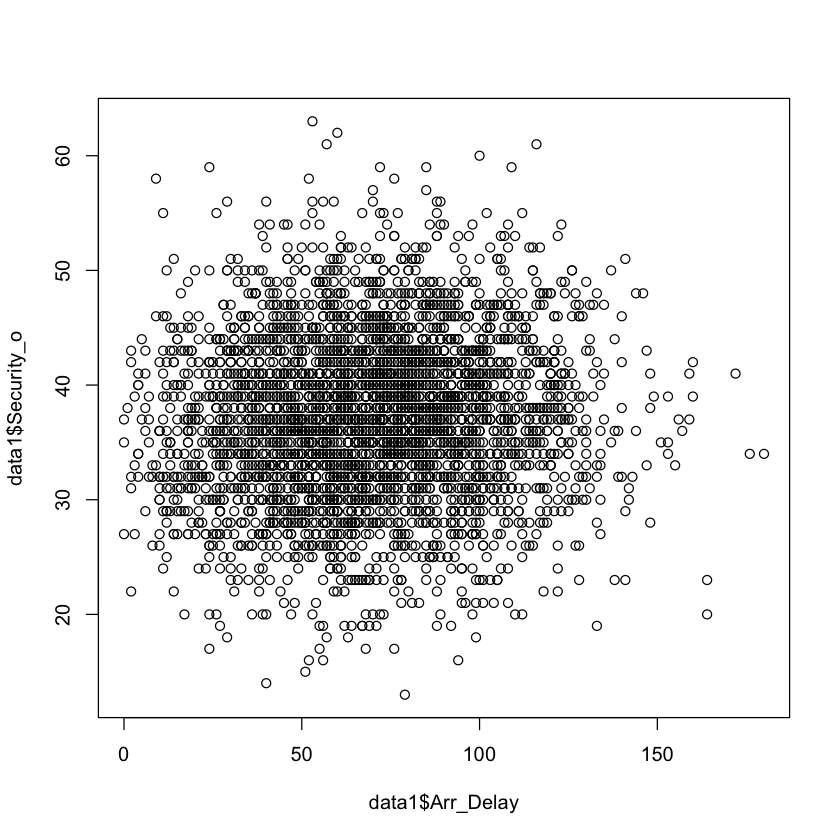

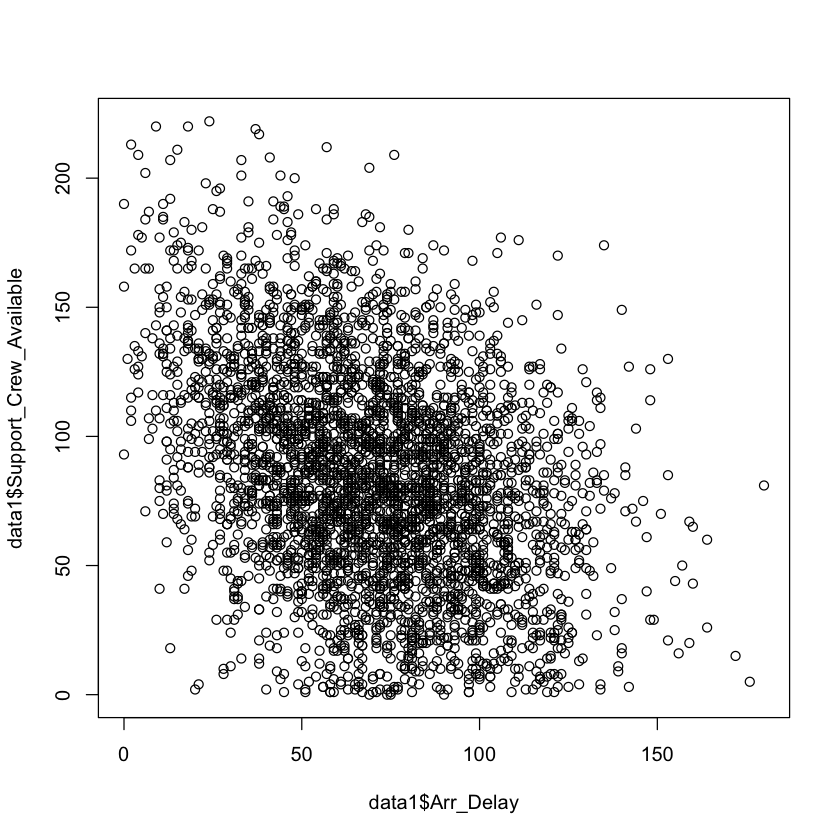

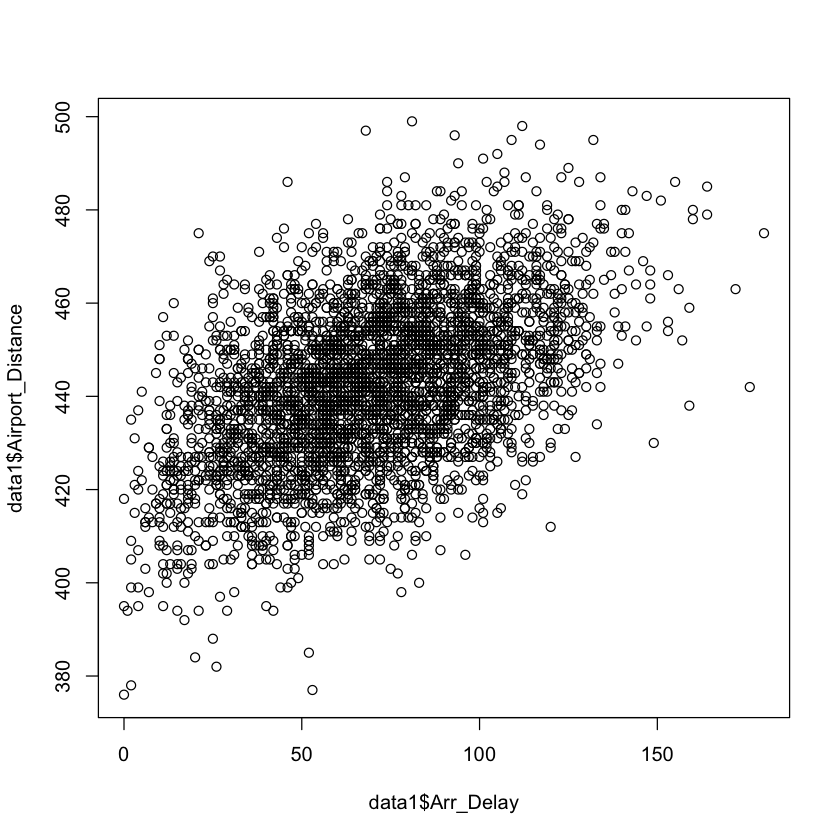

In [51]:
plot(data1$Arr_Delay, data1$Number_of_Flights)
plot(data1$Arr_Delay, data1$Security_o)
plot(data1$Arr_Delay, data1$Support_Crew_Available)
plot(data1$Arr_Delay, data1$Airport_Distance)

In [52]:
library(ggplot2)
library(gridExtra)

In [53]:
p1 <- ggplot(data1, aes(x = Arr_Delay, y = Number_of_flights)) + 
  geom_point() + 
  theme_bw() + 
  ggtitle("Retard d'arrivée vs Nombre de vols")

In [56]:
p2 <- ggplot(data1, aes(x = Arr_Delay, y = Security_o)) + 
  geom_point() + 
  theme_bw() + 
  ggtitle("Retard d'arrivée vs Sécurité_o")

In [57]:
p3 <- ggplot(data1, aes(x = Arr_Delay, y = Support_Crew_Available)) + 
  geom_point() + 
  theme_bw() + 
  ggtitle("Retard d'arrivée vs Disponibilité de l'équipage de soutien")


In [58]:
p4 <- ggplot(data1, aes(x = Arr_Delay, y = Airport_Distance)) + 
  geom_point() + 
  theme_bw() + 
  ggtitle("Retard d'arrivée vs Distance de l'aéroport")



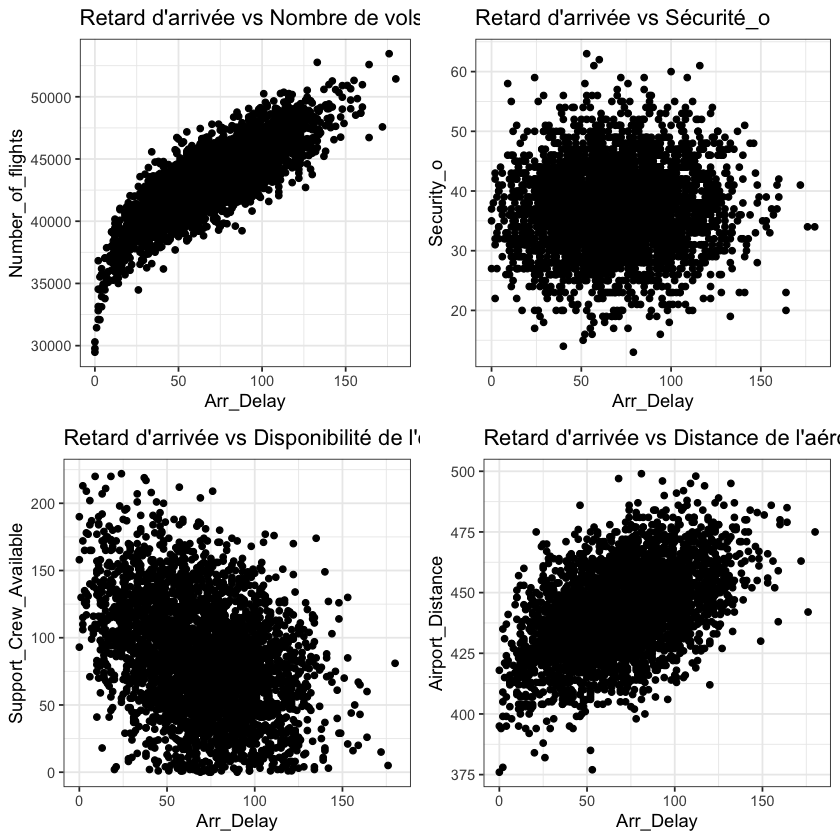

In [59]:
# Utiliser grid.arrange pour arranger les graphiques
grid.arrange(p1, p2, p3, p4, ncol = 2, nrow = 2)


Pour supprimer la première variable (Carrier) de data1

In [60]:
data2 <- data1[-c(1)]

## Division de l'ensemble de données

 en un ensemble de données d'**entrainement** et un ensemble de données de **test**

Les données sont divisées en deux parties, l'ensemble de données de train et l'ensemble de données de test, au moyen d'un échantillonnage aléatoire stratifié, et le ratio de division est de 70:30, ce qui signifie que 70 % des données contribuent à l'ensemble de données de train et 30 % des données contribuent à l'ensemble de données de test. 


L'ensemble de données de train est utilisé pour construire le modèle et l'ensemble de données de test est utilisé pour tester la performance du modèle.

In [61]:
#Installation de caTools pour division des données
library(caTools)
set.seed(3035)
sample <- sample.split(data2$Arr_Delay,SplitRatio=0.70)
train_data <- subset(data2,sample==TRUE)
test_data <- subset(data2,sample==FALSE)


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



L'ensemble de données Train_data est utilisé pour construire le modèle et l'ensemble de données Test_ est utilisé pour tester la performance du modèle.
#Construction d'un modèle de régression linéaire multiple à l'aide de lm sur l'ensemble de données 

In [62]:
model <- lm(Arr_Delay ~., data = train_data)
summary(model)


Call:
lm(formula = Arr_Delay ~ ., data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-35.780  -8.151  -0.583   8.230  70.332 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -5.801e+02  8.943e+00 -64.861  < 2e-16 ***
Airport_Distance        1.751e-01  1.613e-02  10.852  < 2e-16 ***
Number_of_flights       4.418e-03  1.281e-04  34.486  < 2e-16 ***
Weather                 4.721e+00  5.403e-01   8.737  < 2e-16 ***
Support_Crew_Available -5.113e-02  6.398e-03  -7.991 2.03e-15 ***
Baggage_loading_time    1.353e+01  5.238e-01  25.835  < 2e-16 ***
Late_Arrival_o          6.999e+00  3.931e-01  17.804  < 2e-16 ***
Cleaning_o              1.176e-01  7.106e-02   1.654   0.0982 .  
Fueling_o              -1.016e-01  7.086e-02  -1.433   0.1519    
Security_o              8.947e-03  3.505e-02   0.255   0.7985    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.38 on 2504 degr

Dans le code ci-dessus, l'ajustement lm (modèle linéaire) est utilisée pour construire le modèle de régression linéaire multiple. `Arr_Delay` est la variable dépendante ou cible dans les données et toutes les autres variables sont des variables indépendantes ou explicatives. 

L'ensemble de données `Train_data` est utilisé pour entraîner le modèle et le sommaire du modèle affiche le tableau des coefficients et les statistiques du modèle. La liste 6-1 affiche le tableau des coefficients et les statistiques du modèle.

En examinant les coefficients dans le résultat, on constate que certaines variables ont une valeur p inférieure à 0,001 et sont donc des variables significatives du modèle, mais que d'autres variables comme Cleaning_o, Fueling_o et Security_o ont une valeur p supérieure à 0,001 et ne sont donc pas des variables significatives du modèle. Supprimons toutes les variables non significatives du modèle et réexécutons le modèle.

## Modèle final
de régression linéaire multiple avec les variables significatives variables significatives sur l'ensemble de données train_data

In [63]:
model_sig<-lm(Arr_Delay~Airport_Distance+Number_of_flights
+Weather+Support_Crew_Available+Baggage_loading_time
+Late_Arrival_o, data= train_data)
model_sig

In [65]:
summary(model_sig)


Call:
lm(formula = Arr_Delay ~ Airport_Distance + Number_of_flights + 
    Weather + Support_Crew_Available + Baggage_loading_time + 
    Late_Arrival_o, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.224  -8.213  -0.677   8.295  70.468 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -5.809e+02  8.705e+00 -66.734  < 2e-16 ***
Airport_Distance        1.754e-01  1.613e-02  10.877  < 2e-16 ***
Number_of_flights       4.424e-03  1.280e-04  34.570  < 2e-16 ***
Weather                 4.688e+00  5.400e-01   8.683  < 2e-16 ***
Support_Crew_Available -5.171e-02  6.394e-03  -8.087 9.38e-16 ***
Baggage_loading_time    1.350e+01  5.232e-01  25.804  < 2e-16 ***
Late_Arrival_o          7.007e+00  3.930e-01  17.828  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.39 on 2507 degrees of freedom
Multiple R-squared:  0.8209,	Adjusted R-squared:  0.8205 
F-sta

## Analyse du modèle final

Le code ci-dessus montre les coefficients (étiquetés `Estimates`), leurs erreurs standard, les valeurs t et les valeurs P. Les coefficients pour Airport_Distance, Number_of_flights, Weather, Support_Crew_Available, Baggage_loading_time et Late_Arrival_o sont statistiquement significatifs puisque leurs valeurs P sont inférieures à 0.001. 

Dans un modèle de régression linéaire, pour une augmentation d'une unité dans les variables prédictives ou indépendantes, cela affichera le changement (augmentation ou diminution) dans le résultat ou la variable dépendante. Cela peut être expliqué comme suit :

1. Pour chaque augmentation d'une unité dans Number_of_flights, cela augmente l'Arr_Delay de (0.004)
2. De même pour Support_Crew_Available qu'une diminution d'une unité dans Support_Crew_Available augmente l'Arr_Delay de (-0.05)
3. De même pour Late_Arrival_o qu'une augmentation d'une unité dans Late_Arrival_o augmente l'Arr_Delay de (7.007)

Le nombre de valeurs ajustées est de 2514 et le nombre d'observations dans l'ensemble de données de formation est également de 2514 ; cela signifie que les valeurs ajustées sont les valeurs prédites de l'ensemble de données de formation.

## Prédiction 
Prédire les valeurs ajustées de l'ensemble train_data

In [66]:
pred_train<- model_sig$fitted.values
head(pred_train)

1         3         4        10        11        12 
 60.25684   8.64335  98.66114  95.44036  72.93578 104.41100

### Valeurs résiduelles

In [67]:
resed_train <- model_sig$residuals
head(resed_train)

1          3          4         10         11         12 
 -2.256842   7.356650 -17.661140  26.559637 -13.935782  17.589005

Les valeurs résiduelles sont la différence entre les valeurs réelles et les valeurs prédites. Si les valeurs réelles sont supérieures aux valeurs prédites, les valeurs résiduelles sont positives et si les valeurs réelles sont inférieures aux valeurs prédites, les valeurs résiduelles sont négatives.

In [77]:
pred_test<- predict(model_sig,newdata = test_data)
head(pred_test)
pred_test1<- data.frame(pred_test)

2        5        6        7        8        9 
63.71968 66.64359 32.76744 63.25060 47.70671 71.13357

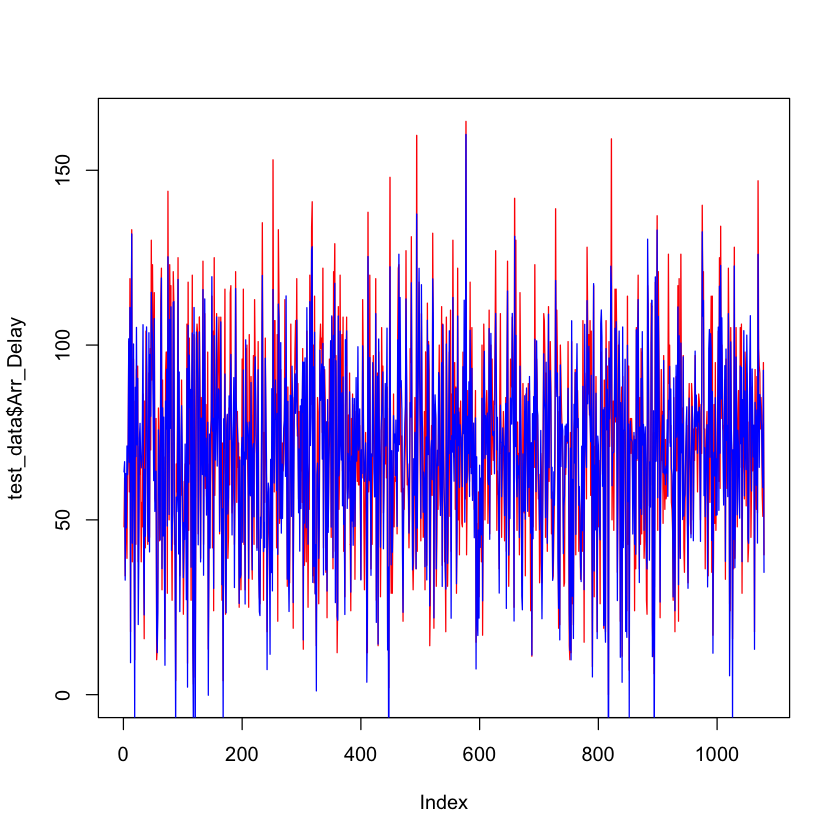

In [78]:
plot (test_data$Arr_Delay,col="red",type ="l",lty=1.8)
lines(pred_test1,col="blue",type ="l",lty=1.4)

La figure ci-dessus présente le graphique des résultats réels par rapport aux résultats prévus. Les lignes rouges représentent les valeurs réelles de l'ensemble des données de test et les lignes bleues représentent les valeurs prédites. 

On peut remarquer que la plupart des lignes bleues et rouges se chevauchent, à l'exception de quelques cas. Dans ce cas, on constate que la plupart des valeurs prédites suivent de près les valeurs réelles, ce qui indique qu'il s'agit d'un bon modèle silencieux.